In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
%matplotlib inline

In [8]:
class GaussianDiscriminantAnalysis:
    
    def __init__(self, visualization=False):
        self.visualization = visualization
        if visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def train(self, X, y):
        if self.visualization:
            self.ax.scatter(X[:, 0], X[:, 1], c=y, s=4)
            
        self.phi = len(X[y==1])/X.shape[0]
        self.mu = [X[y==0].mean(axis=0), 
                   X[y==1].mean(axis=0)]
        self.sigma = np.cov(X, rowvar=False, bias=True)
    
    def prob_class(self, cl):
        return np.power(self.phi, cl) * np.power((1 - self.phi), 1-cl)
    
    def prob_x_if_class(self, x, cl):
        n = x.shape[0]

        exp = np.exp(-0.5 * (x - self.mu[cl]) @ inv(self.sigma) @ (x - self.mu[cl]).T)
        
        return exp / (np.power((2 * np.pi), n/2) * np.power(np.linalg.det(self.sigma), 2))
    
    def predict(self, X):
        result = []
        for vector in X:
            result.append(self._predict_vector(vector))
        return np.array(result)
        
    def _predict_vector(self, vector):
        
        m = vector.shape[0]
    
        prob0 = np.log(self.prob_x_if_class(vector, 0) * self.prob_class(0))
        prob1 = np.log(self.prob_x_if_class(vector, 1) * self.prob_class(1))
        if prob0 > prob1:
            return 0
        else:
            return 1
        
    def score(self, X, y):
        return (self.predict(X_test) == y).mean()

## Example of using GDA

0.89333333333333331

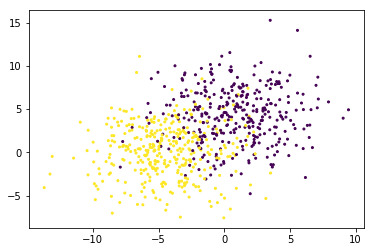

In [10]:
X, y = make_blobs(1000, n_features=2, centers=2, random_state=3, cluster_std=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

gda = GaussianDiscriminantAnalysis(visualization=True)
gda.train(X_train, y_train)
gda.score(X_test, y_test)

## Comparing with sklearn 

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.89666666666666661